# Stocks Adjusted Close Price  Comparison with Python  

## Importing the required libraries:

In [49]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Time window & the stocks list for comparison:

In [43]:
start_date,end_date='2014-01-01', '2022-05-14'                    

In [44]:
stocks = ['MSFT','AAPL','GOOG','FB']

In [45]:
dates = pd . date_range ( start_date , end_date )

### Functions to merge the stocks into a single dataframe & plot them together:

In [16]:
def stocks_price(stocks, start_date, end_date):
    df_merged = pd.DataFrame (index = dates) 
    for stock in stocks:
        df_temp = yf.download(stock , start=start_date, end=end_date, progress=False)
        df_temp = df_temp. rename ( columns ={'Adj Close':stock})
        df_temp = df_temp.loc [:, stock]
        df_merged = df_merged.join(df_temp , how ='inner')
    return df_merged
    

In [46]:
df1 = stocks_price(stocks, start_date, end_date)
df1

,MSFT,AAPL,GOOG,FB
2014-01-02,31.798321,17.468657,554.481689,54.709999
2014-01-03,31.584396,17.084936,550.436829,54.560001
2014-01-06,30.916946,17.178106,556.573853,57.200001
2014-01-07,31.156542,17.055254,567.303589,57.919998
2014-01-08,30.600317,17.163260,568.484192,58.230000
...,...,...,...,...
2022-05-09,264.579987,152.059998,2261.679932,196.210007
2022-05-10,269.500000,154.509995,2291.689941,197.649994
2022-05-11,260.549988,146.500000,2279.219971,188.740005
2022-05-12,255.350006,142.559998,2263.219971,191.240005


In [19]:
def normalize_data ( df ) :
    df = df / df . iloc [0 ,:]
    return df

In [63]:
def plot_data ( df , title =" Stock prices ") :
    ax = df . plot ( title = title , fontsize =12)
    ax . set_xlabel (" Date ")
    ax . set_ylabel (" Adj. Closing price ")
    
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%Y')
    monthsFmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

    ax.grid(True)
    plt.rcParams["figure.figsize"] = (14,3)
    plt.xticks(rotation = 90)
    plt . show ()


In [64]:
def plot_selected ( df ,  start_ind , end_ind,columns, normalized=False) :
    #print (df . loc [ start_ind : end_ind , columns ])
    if normalized:
        plot_data ( normalize_data(df.loc[ start_ind : end_ind , columns ]), title ="Normalized Stock prices")
    else:
        plot_data ( df.loc[ start_ind : end_ind , columns ], title =" Stock prices ")

### Adj. Close Price:

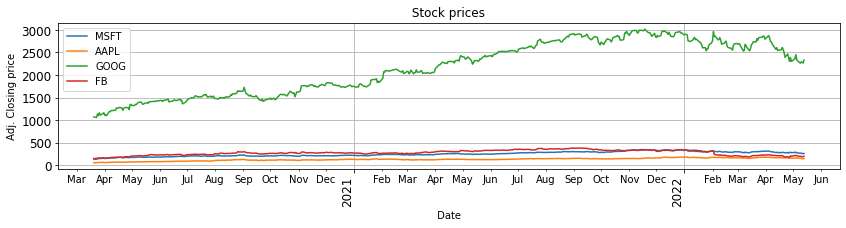

In [65]:
plot_selected (df1,'2020-03-20','2022-05-13',stocks )

### Normalized Adj. Close Price:

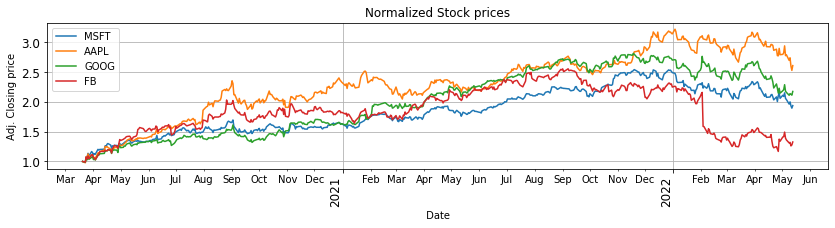

In [66]:
plot_selected (df1,'2020-03-20','2022-05-13',stocks,normalized= True )